<a href="https://colab.research.google.com/github/Nusrat2002m/Complete-ANN/blob/main/Complete_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Requires the latest pip
!pip install --upgrade pip

# Current stable release for CPU and GPU
!pip install tensorflow

# Or try the preview build (unstable)
!pip install tf-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.8/656.8 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.20.0-dev20250319


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide the dataset into independent and dependent features
x = data.iloc[:, 3:13] # (:) before it means all the row
y = data.iloc[:, 13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
# feature Engineering
#this things basically "one hot encoding"
geo = pd.get_dummies(x['Geography'], drop_first=True) # dummies is take unique features from the geography column,,,and for using (drop_first=True), we drop the 1st column from geography, which is france
gen = pd.get_dummies(x['Gender'], drop_first=True)

In [ ]:
# concatenate these variables with dataframe
x.drop(['Geography', 'Gender'], axis=1, inplace=True) #axis=1 ,drop the column
x = pd.concat([x, geo, gen], axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
# spliting the dataset into Training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# features scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
# create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# Initialize the ANN
classifier = Sequential()

In [ ]:
# Adding the input Layer
classifier.add(Dense(units=11, activation='relu'))

In [ ]:
# Adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
# early stoping
#when accuracy is not incresing then automatic the training will stop
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20,min_delta =0.0001, restore_best_weights=False)

In [ ]:
model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=[early_stop])

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7963 - loss: 0.6013 - val_accuracy: 0.8497 - val_loss: 0.4012
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8336 - loss: 0.4098 - val_accuracy: 0.8421 - val_loss: 0.3845
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8394 - loss: 0.3898 - val_accuracy: 0.8417 - val_loss: 0.3838
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8497 - loss: 0.3942 - val_accuracy: 0.8417 - val_loss: 0.3812
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8443 - loss: 0.3814 - val_accuracy: 0.8436 - val_loss: 0.3846
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8459 - loss: 0.3813 - val_accuracy: 0.8448 - val_loss: 0.3782
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8402 - loss: 0.3920 - val_accuracy: 0.8425 - val_loss: 0.3841
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8547 - loss: 0.3658 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

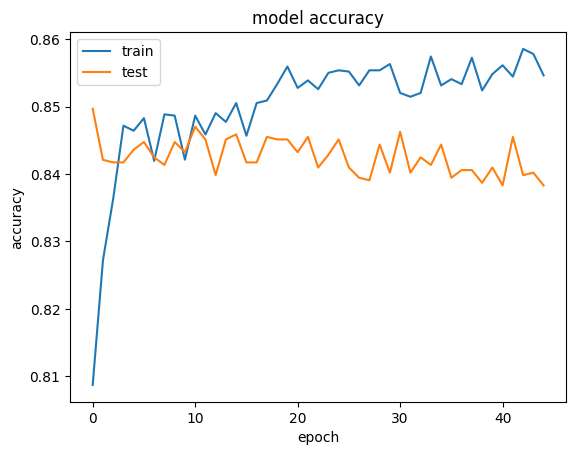

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

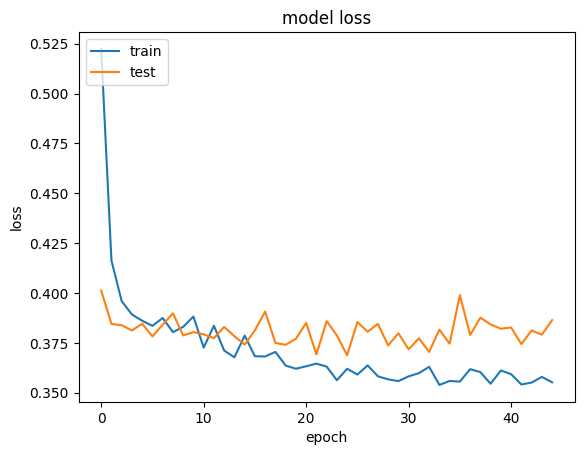

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1579,   16],
       [ 277,  128]])

In [ ]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8535

In [ ]:
# Get the weights
classifier.get_weights()

[array([[ 0.01026681, -0.30932283, -0.28108943, -0.2514374 ,  0.1910978 ,
         -0.33748764,  0.4397107 ,  0.11435052, -0.07673521,  0.05562788,
         -0.231473  ],
        [ 0.00344881, -0.02015384, -0.7338142 ,  0.31133202, -0.08871169,
          0.44837305, -0.10925378,  0.00857785, -0.7555605 , -0.95817745,
         -0.23084734],
        [-0.06185462, -0.15251443, -0.10040125, -0.3262043 ,  0.34395486,
          0.01787183, -0.46839368,  0.5849231 ,  0.12767749, -0.203271  ,
         -0.49107072],
        [ 0.1926444 ,  0.26652363,  0.26396993, -0.56974953, -0.16056518,
          0.36116144, -0.18642302, -0.46740568, -0.05001104, -0.08623777,
          0.33913222],
        [ 1.141074  , -0.39227366,  0.21586165, -1.0691671 ,  0.45087263,
          0.33320498,  0.6213912 ,  0.7660447 ,  0.1098969 ,  0.06547282,
          0.1415163 ],
        [-0.0192295 ,  0.00381478, -0.06710692,  0.10533494,  0.2812822 ,
          0.12040332, -0.21602833, -0.28770155,  0.02560933, -0.0668415